In [39]:
#import opendatasets as od # no para python 3.13
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops



### **Visualizacion de Datos**

### **M0**

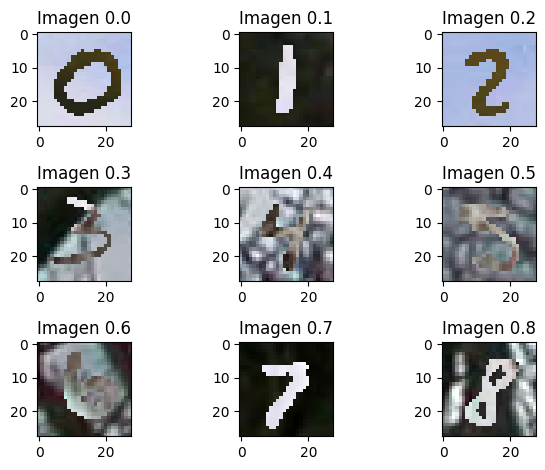

In [40]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m0/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M1**

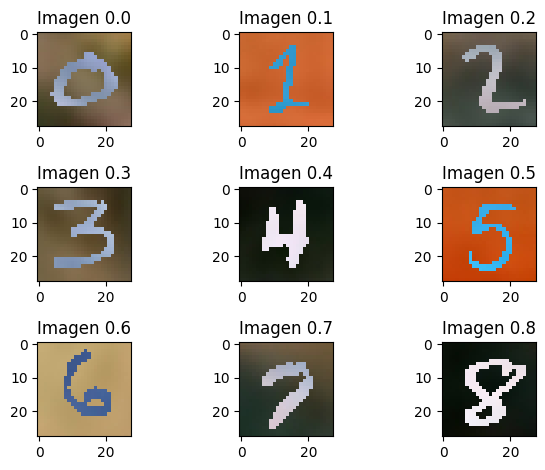

In [41]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m1/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M2**

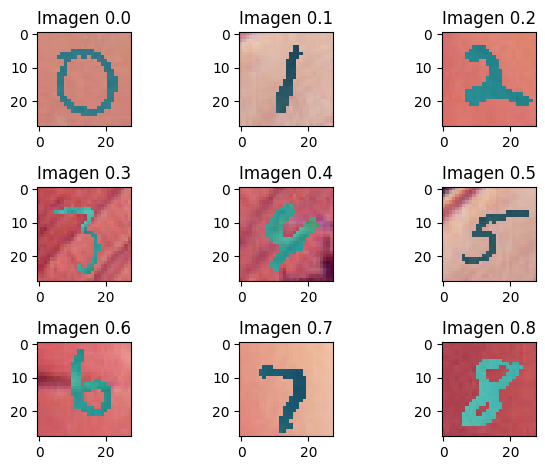

In [42]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m2/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **m3**

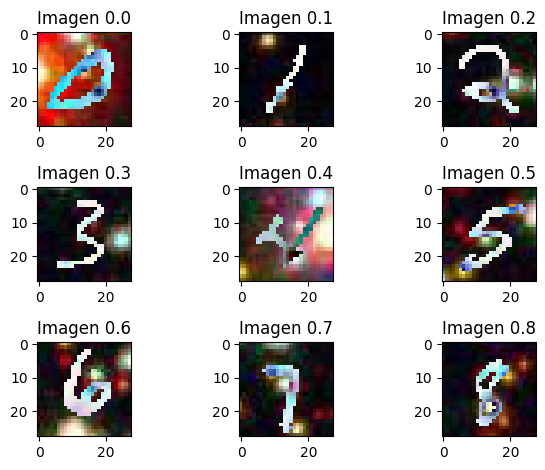

In [43]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m3/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **M4**

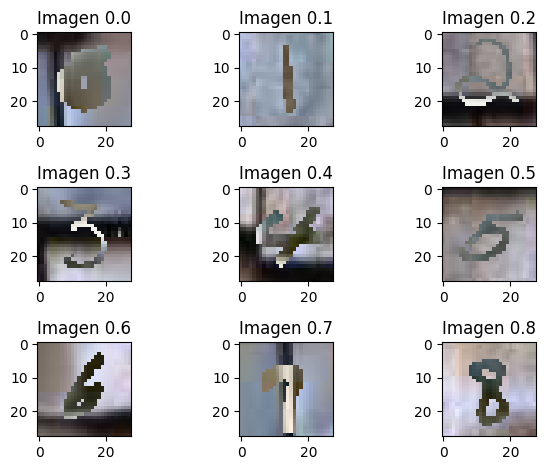

In [44]:
import matplotlib.pyplot as plt
import os

# Ruta al folder de imágenes
folder = "./MMNIST/train/m4/"

# Mostrar las primeras 9 imágenes
for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(folder, f"0.{i}.png")
    image = plt.imread(filename)
    plt.imshow(image)
    plt.title(f"Imagen 0.{i}")

plt.tight_layout()
plt.show()


### **Cargar Imagenes por lote**

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Transformaciones para entrenamiento ===
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2]
)

# === Solo normalización para prueba ===
test_datagen = ImageDataGenerator(rescale=1./255)

# === Generador para entrenamiento ===
train_generator = train_datagen.flow_from_directory(
    './MMNIST/train',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)

# === Generador para prueba ===
test_generator = test_datagen.flow_from_directory(
    './MMNIST/test',
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)


Found 300000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.


In [46]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2,2)))    # 14x14x32
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2)))    # 7x7x64
model.add(keras.layers.Flatten())              # 3136
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))  # 5 clases: m0 a m4

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,485 (861.27 KB)

 Trainable params: 220,485 (861.27 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=10,                   # Puedes ajustar
    validation_data=test_generator
)


Epoch 1/10
2305/9375 ━━━━━━━━━━━━━━━━━━━━ 29:25 250ms/step - accuracy: 0.8735 - loss: 0.2991

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()
